In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2.3 Ejemplo**

Considere la Encuesta de Desarrollo e Innovación Tecnológica (EDIT), 2015-2016, para Colombia. En esta encuesta se toman todas las empresas industriales a nivel nacional que cumplen los parámetros de inclusión (establecimientos industriales con 10 o más personas ocupadas o que registren un valor de producción anual mayor o igual a un valor determinado). Toda la información al respecto de la encuesta se encuentra disponible en https://www.dane.gov.co/. La base de datos dada en ```EDIT.txt``` contiene la información de $n=1718$ empresas que reportaron los datos en relación con:

- Departamento interno de I+D (1 = Sí, 2 = “No”).
- Disminución en el pago de impuestos (1 = Alta, 2 = Media, 3 = Nula).
- Ventas nacionales totales (en miles de millones de pesos).
A continuación se resume la información de la variable departamento de I+D.

        0
SI  28.23
NO  71.77


Text(0.5, 1.0, 'Frecuencia relativa')

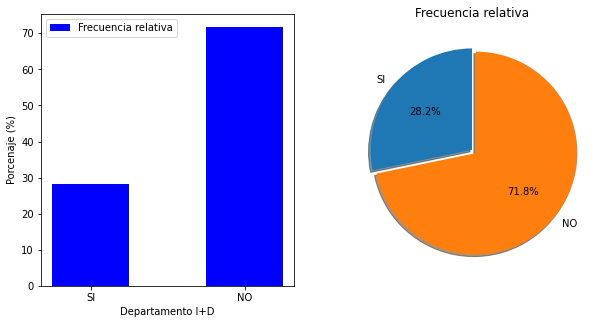

In [175]:
# Importar datos
EDIT = pd.read_csv('EDIT.txt', sep='\t',header=0)
# Tamaño de la muestra
n = EDIT.shape[0]
# Tabla de frecuencias relativas
tabla = 100*EDIT.groupby(['ID']).size()/n
tabla = tabla.to_frame()
tabla.index = ["SI", "NO"]
print(tabla.round(2))

# Place two graphs on each side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# Grafico de barras
ax1.bar(['SI', 'NO'],height= tabla[0], color='b', width=0.5, label="Frecuencia relativa")
ax1.set_xlabel('Departamento I+D')
ax1.set_ylabel('Porcenaje (%)')
ax1.legend()

# Grafico de pastel
explode = (0, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax2.pie(tabla[0], labels=tabla.index, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
ax2.set_title('Frecuencia relativa')


    Alta  Media   Nula
SI  1.86   7.33  19.03
NO  2.50  10.42  58.85


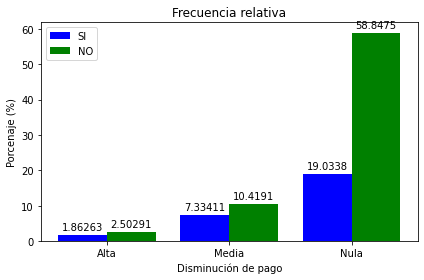

(array([  75.,    0.,    0.,    0.,    0.,  305.,    0.,    0.,    0.,
        1338.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

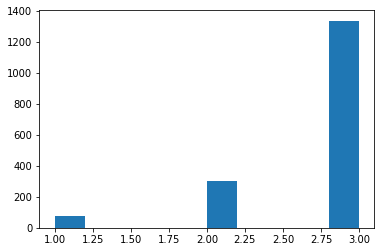

In [241]:
tabla = (100*EDIT.groupby(['ID', 'Disminucion']).size()/n).unstack()
tabla.index = ['SI', 'NO']
tabla.columns = ["Alta", "Media", "Nula"]
print(tabla.round(2))

# Grouped bar plot
x = np.arange(len(tabla.columns))
width= 0.4
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, tabla.iloc[0], color='b', width=width, label="SI")
rects2 = ax.bar(x + width/2, tabla.iloc[1], color='g', width=width, label="NO")

ax.set_xlabel('Disminución de pago')
ax.set_ylabel('Porcenaje (%)')
ax.set_title('Frecuencia relativa')
ax.set_xticks(x, tabla.columns)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()